## Import the necessary packages

In [2]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
def extract_data_from_zip(zip_file_path, data_path):
    with zipfile.ZipFile(zip_file_path, 'r') as my_zip:
        my_zip.extractall(data_path)

## Reading the data

In [3]:
df = pd.read_csv("data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## EXPLANATORY DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Checking for missing and duplicated values

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Drop the missing values 

In [7]:
df_cleared = df.dropna()
df_cleared.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### The overview of the data 

In [9]:
df_cleared.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
df_cleared.describe(include='object')

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


### Data Exploration for Video Games Market

**What are the 5 most selling video games in terms of global sales ?** 

In [11]:
df_cleared.sort_values(by=['Global_Sales'], ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**CONCLUSION:** They are 5 games of Nintendo Publisher (_Wii Sports, Super Mario Bros, Mario Kart Wii, Wii Sports Resort, Pokemon Red_)

For _further exploration about market share_, I decided to find the most selling games respectively to **each region** in the world like North America, Europe, Japan,...

In [12]:
df_cleared.sort_values(by=['NA_Sales'], ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [13]:
df_cleared.sort_values(by=['EU_Sales'], ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


In [14]:
df_cleared.sort_values(by=['JP_Sales'], ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


**CONCLUSION:** The most selling video games in each region and the world in general are published by Nintendo, implying the dominance of this game publisher in the market.

### Evolution of Video games Industry

After making sense of the game industry, now I am interested in the its evolution. These are some questions I want to answer:
1. How many top games have been released into the market until now?
2. Which released year that generated the most sales ?

<Axes: title={'center': 'Top Games over Years '}, xlabel='Released games'>

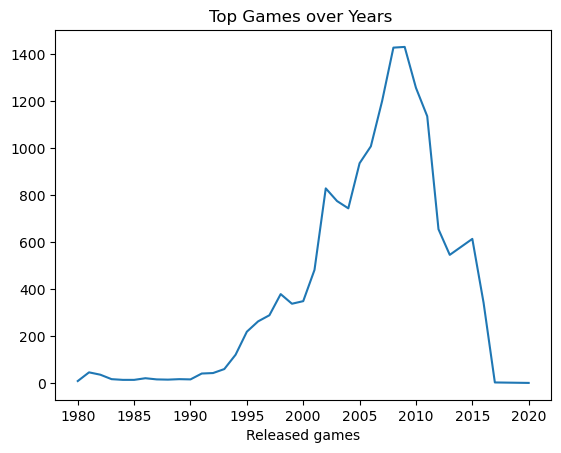

In [54]:
df_cleared['Year'].value_counts().sort_index().plot(kind='line', 
                                                    xlabel='Released games', 
                                                    title='Top Games over Years ')

<Axes: xlabel='Year'>

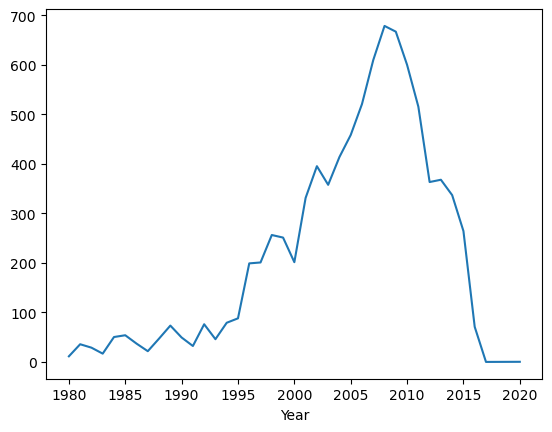

In [25]:
df_cleared.groupby(by=['Year'])['Global_Sales'].sum().sort_index().plot(kind='line')

**CONCLUSION:** According to the graph, the period 2005 - 2012 seems to be the most dynamic period when most of the top games in the market are released and that generated the most revenus in the game industry

Moreover, I explored more about the evolution of the Genre in the Video Games Industry presenting in the top

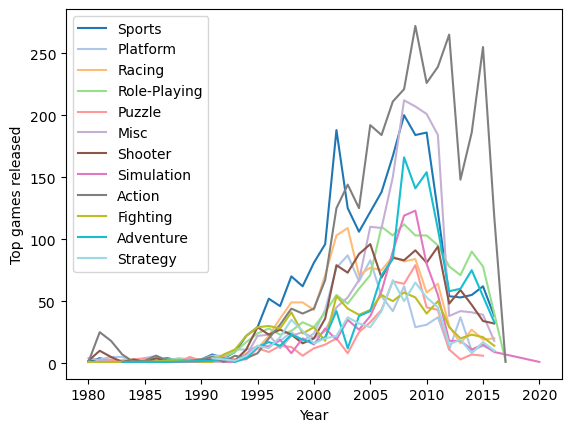

In [ ]:
GENRES = df_cleared['Genre'].unique()
colors = plt.get_cmap('tab20', len(GENRES))
for idx, genre in enumerate(GENRES):
    color = colors(idx)
    df_cleared.groupby(by=['Genre'])['Year'].value_counts()[genre].sort_index().plot(kind='line', 
                                                                                     label=genre, 
                                                                                     color = color)
plt.ylabel('Top games released')
plt.legend()
plt.show()

**CONCLUSION:** Action Games are released the most, following Sports Games, Misc,...

### Top 5 most frequent platform/publisher/genre of video games

<Axes: title={'center': 'Top 10 platforms'}, xlabel='Platform', ylabel='Number of Games'>

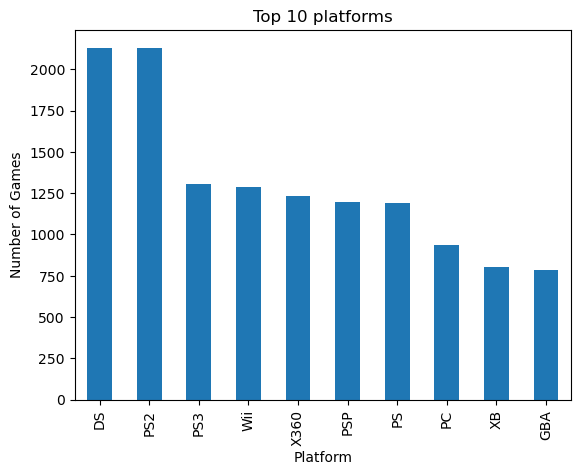

In [100]:
df_cleared['Platform'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                                 ylabel='Number of Games',
                                                                                 title='Top 10 platforms')

**CONCLUSION:** DS and PS2 are the most two popular platforms in the video games industry

<Axes: title={'center': 'Top 10 Genres'}, xlabel='Genre', ylabel='Number of Games'>

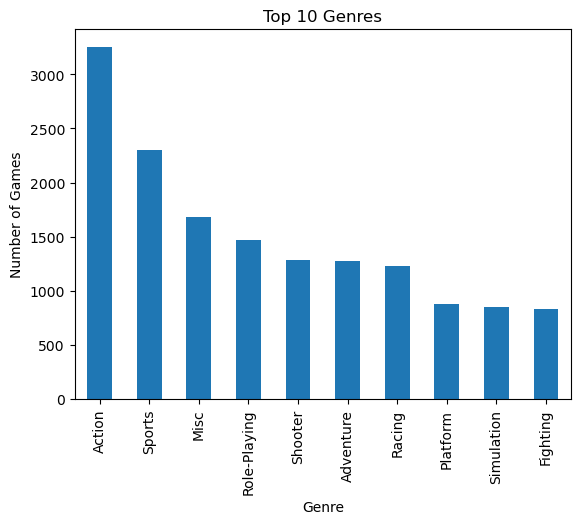

In [101]:
df_cleared['Genre'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                                 ylabel='Number of Games',
                                                                                 title='Top 10 Genres')

**CONCLUSION:** Action is the most popular genre of the industry with more than 3000 released games, following Sports, Misc and Role-playing 

<Axes: title={'center': 'Top 10 Publishers'}, xlabel='Publisher', ylabel='Number of Games'>

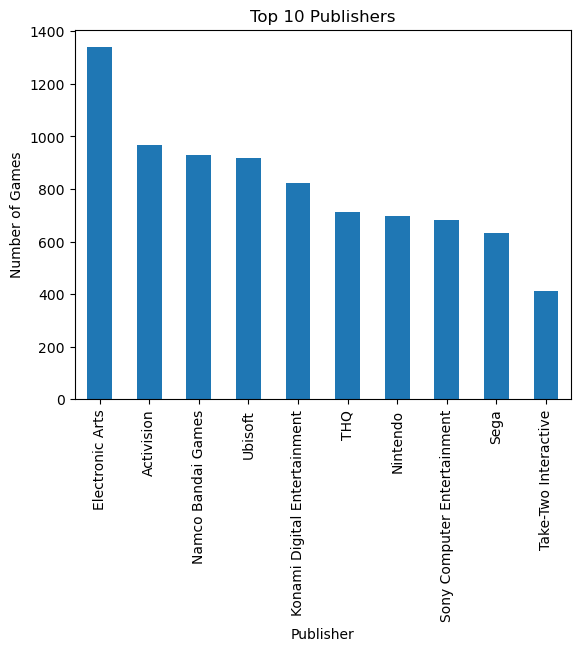

In [102]:
df_cleared['Publisher'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                                 ylabel='Number of Games',
                                                                                 title='Top 10 Publishers')

**CONCLUSION:** Electronic Arts is the publisher that released the most number of video games over 10 000 copies, along with Activision. Noticeably, in spite of its dominance in terms of sales, Nintendo has released estimatedly 700 games.

But _many games don't mean high sales_. Therefore, I continued to explore more about the video games industry by answering these questions:
1. Genres that have the most sales in the world
2. Publishers that have the most sales in the world
3. Platforms that have the most sales in the world
4. Which genre of which publisher generates the most sales
5. Which genre of which platform generates the most sales
6. Which platforms of which publisher generates the most sales

<Axes: ylabel='Genre'>

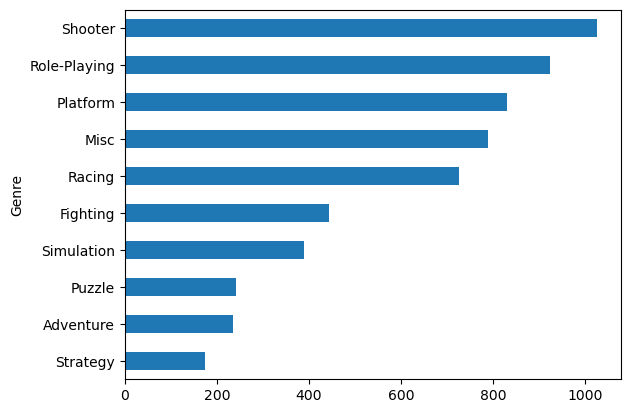

In [59]:
df_cleared.groupby(by=['Genre'])['Global_Sales'].sum().sort_values().head(10).plot(kind='barh')

<Axes: title={'center': 'Top 10 High Sales Publishers'}, xlabel='Publisher', ylabel='Global Sales'>

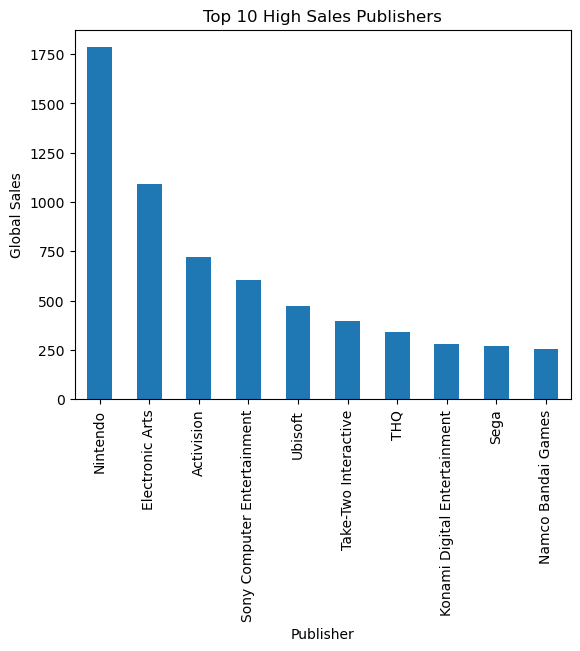

In [75]:
df_cleared.groupby(by=['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', 
                                                                                                      title='Top 10 High Sales Publishers',
                                                                                                      ylabel='Global Sales')

<Axes: title={'center': 'The most high sale Platforms'}, xlabel='Platform'>

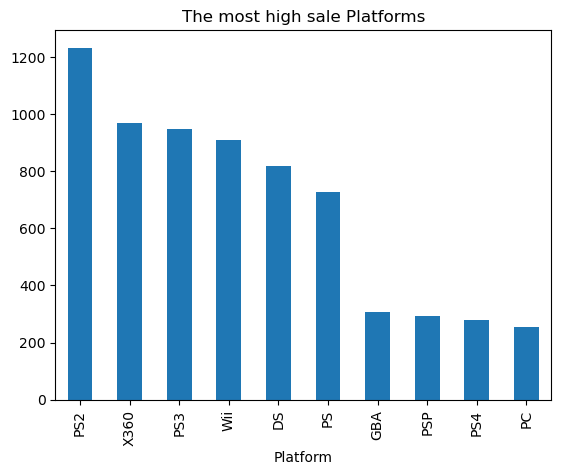

In [62]:
df_cleared.groupby(by=['Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                                                     title='The most high sale Platforms')

<Axes: xlabel='Publisher,Genre'>

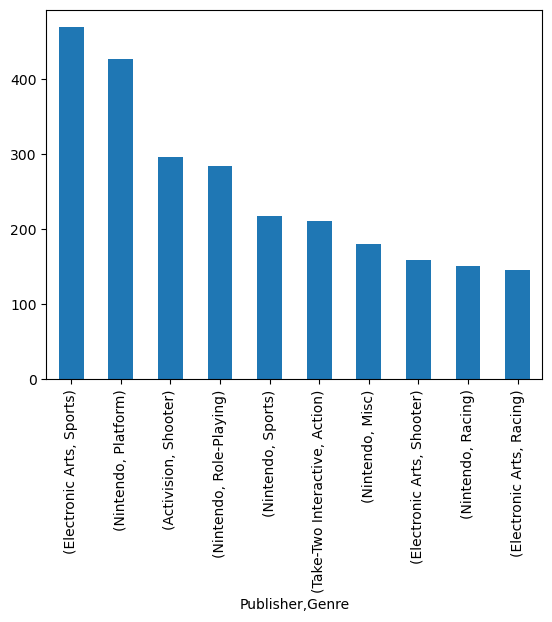

In [63]:
df_cleared.groupby(by=['Publisher', 'Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='Publisher,Platform'>

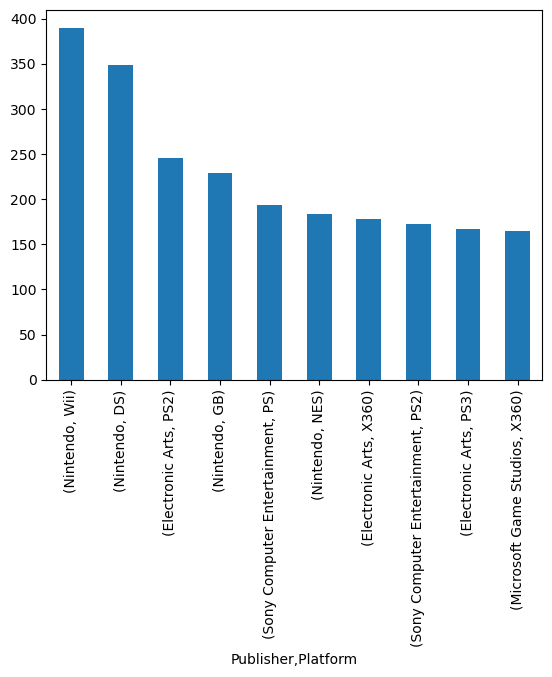

In [64]:
df_cleared.groupby(by=['Publisher', 'Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='Platform,Genre'>

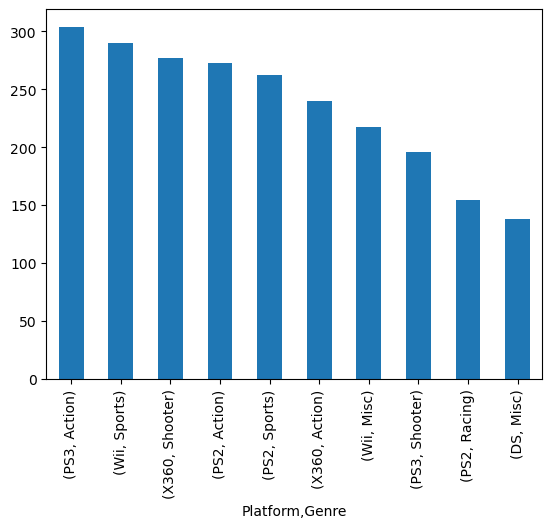

In [65]:
df_cleared.groupby(by=['Platform', 'Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

**CONCLUSION:**
1. Shooter, Role-playing, Platform, Misc, Racing
2. Nintendo, EA, Activision, Ubisoft
3. PS2, X360, PS3, Wii, DS
4. (EA, Sports), (Nintendo, Platform)
5. (Nintendo, Wii), (Nintendo, DS)
6. (PS3, Action), (Wii, Sports) 